# Tutorial 2: 

### Simple Linear Regression
Regression is one of the most common data science problems. It, therefore, finds its application in artificial intelligence and machine learning. Regression techniques are used in machine learning to predict continuous values, for example predicting salaries, ages or even profits. Linear regression is the type of regression in which the correlation between the dependent and independent factors can be represented in a linear fashion.

- Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.
- Simple Linear Regression is the type of regression in which a single independent variable is used to predict the values of the dependent variable. It is the simplest of regression models.
![Linear_Regression_Formula](images\LR_formula.png "Linear_Regression_Formula")
- For a simple regression problem, the above equation can be simplified as:
![Simple_Linear_Regression_Formula](images\simple_linear_eq.png "Simple_Linear_Regression_Formula")

##### For deeper understanding behind the mathematics of Simple Linear Regression, use the following resources:
- [Introduction to Linear Regression](http://onlinestatbook.com/2/regression/intro.html)
- [Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

#### Step 1. Data Preprocessing
- Importing the libraries.
- Importing the data set.
- Classifying dependent and independent variables.
- Creating training and test sets.

#### Step 2. Simple Linear Regression
- Creating a Simple Linear Regressor.
- Training the regressor with training data.
- Predicting the salary for a test set.
- Calculating the accuracy of the predictions.
- Comparing Actual and Predicted Salaries for the test set.

# Load Essential Dependencies

In [17]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
file_name = 'Datasets/salary_data.csv'
dataset = pd.read_csv(file_name)

In [4]:
#Displaying the dataset
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 30 rows and 2 columns.


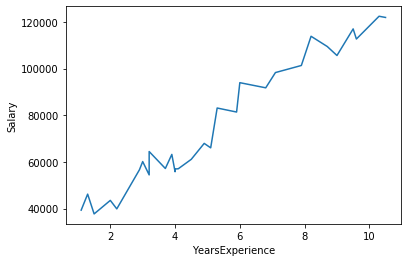

In [10]:
plt.plot(dataset['YearsExperience'], dataset['Salary']);
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [11]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

In [13]:
print("\nIdependent Variable (Experience):\n\n", X[:5].T)
print("\nDependent Variable (Salary):\n\n", y[:5])


Idependent Variable (Experience):

 [[1.1 1.3 1.5 2.  2.2]]

Dependent Variable (Salary):

 [39343. 46205. 37731. 43525. 39891.]


In [14]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
#Divide the dataset into Train and Test sets --> varies between (0.2 - 0.3)
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 0) 

In [15]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[9.6]
 [4. ]
 [5.3]
 [7.9]
 [2.9]]
y = 
 [112635.  55794.  83088. 101302.  56642.]


Test Set :
----------------

X = 
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]]
y = 
 [ 37731. 122391.  57081.  63218. 116969.]


In [16]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (24, 1)
Shape of Testing set is (6, 1)


# Apply Linear Regression 

In [37]:
"""# II. Simple Linear Regressor """

#5 import SLR library
from sklearn.linear_model import LinearRegression

# configure params for the model.
fit_int_wig = widgets.ToggleButtons(
                options=['TRUE', 'FALSE'],
                description='Fit Intercept :',
                disabled=False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False,\
                          no intercept will be used in calculations.'])

display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                value='FALSE',
                options=['TRUE', 'FALSE'],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                            If True, the regressors X will be normalized before regression by \
                            subtracting the mean and dividing by the l2-norm.'],
                style=style)

display(norm_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

ToggleButtons(description='Fit Intercept :', options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(description_w…

ToggleButtons(description='Normalize :', index=1, options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(descript…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

In [38]:
regressor = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [39]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df

Prediction Accuracy =  0.988169515729126

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,37731.0,40748.961841,3017.961841
1,122391.0,122699.622956,308.622956
2,57081.0,64961.657170,7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


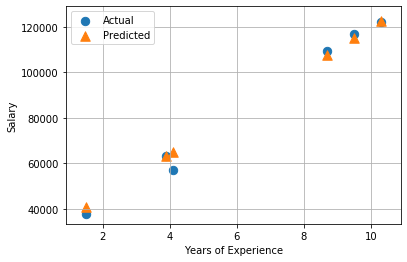

In [40]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_Pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend();
plt.grid();
plt.show();

In [41]:
# Evaluate different Regression metrics

from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [42]:
print(f"Root Mean Squared Error : {(mean_squared_error(y_true=y_test, y_pred=y_Pred))**(1/2)}")
print(f"Root Mean Squared Log Error : {(mean_squared_log_error(y_true=y_test, y_pred=y_Pred))**(1/2)}")

Root Mean Squared Error : 3580.979237321343
Root Mean Squared Log Error : 0.06204863611005742
